In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Asif Baloch\Desktop\Churn.csv\Customer Churn.csv")

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df['Churn'].value_counts(normalize=True) *100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [16]:
df["customerID"].duplicated().sum()

np.int64(0)

In [17]:
def convert(values):
    if values==0:
        return("yes")
    else:
        return("no")
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)    

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,yes,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,yes,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,yes,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


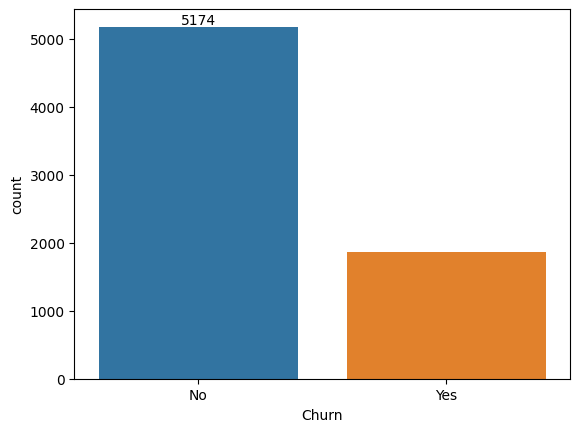

In [21]:
ax=sns.countplot(x='Churn',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.show()

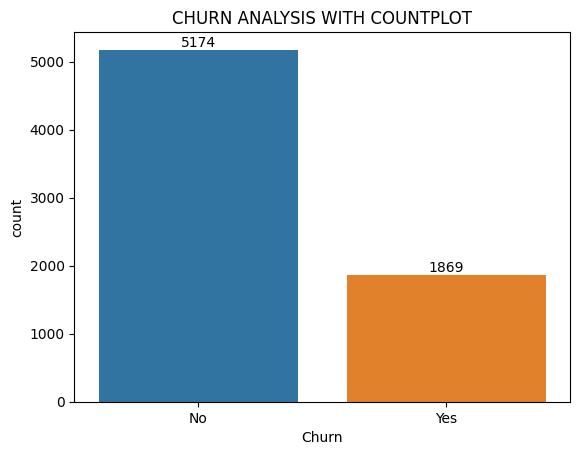

In [22]:
ax=sns.countplot(x="Churn",data=df,hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("CHURN ANALYSIS WITH COUNTPLOT")
plt.show()    

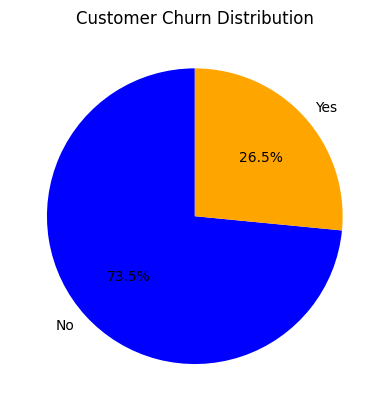

In [28]:
# import matplotlib.pyplot as plt
# values=df['Churn'].value_counts()
# labels=df["Churn"].value_counts().index
# plt.pie(x="Churn",data=df,labels=labels,autopct='%1.1f%%',startangle=90,colors=["blue","orange"])
# plt.show()
# import matplotlib.pyplot as plt

# Values & labels
values = df['Churn'].value_counts()
labels = df['Churn'].value_counts().index

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue','orange'])
plt.title("Customer Churn Distribution")
plt.show()

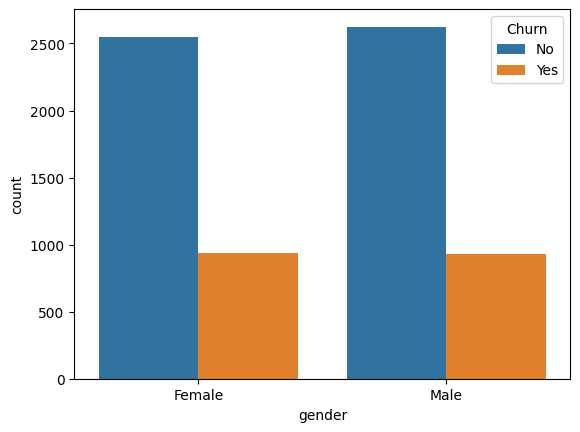

In [ ]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("CHURN BY GENDER")
plt.show()

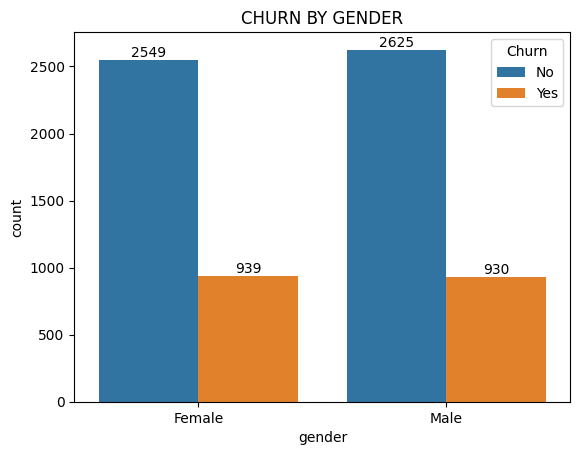

In [37]:
ax=sns.countplot(x='gender',data=df,hue='Churn')
for containers in ax.containers:
 ax.bar_label(containers)
plt.title("CHURN BY GENDER")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

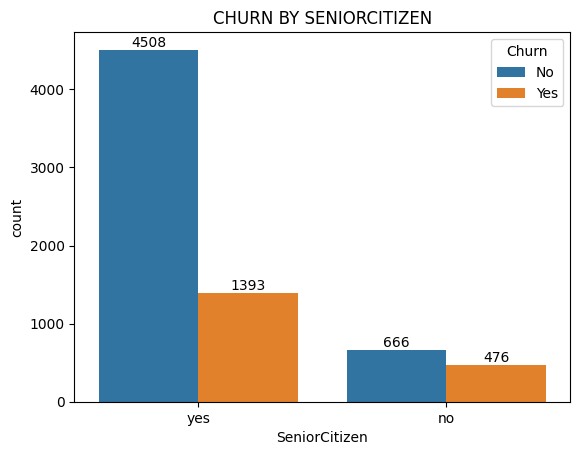

In [39]:
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
for containers in ax.containers:
 ax.bar_label(containers)
plt.title("CHURN BY SENIORCITIZEN")
plt.show

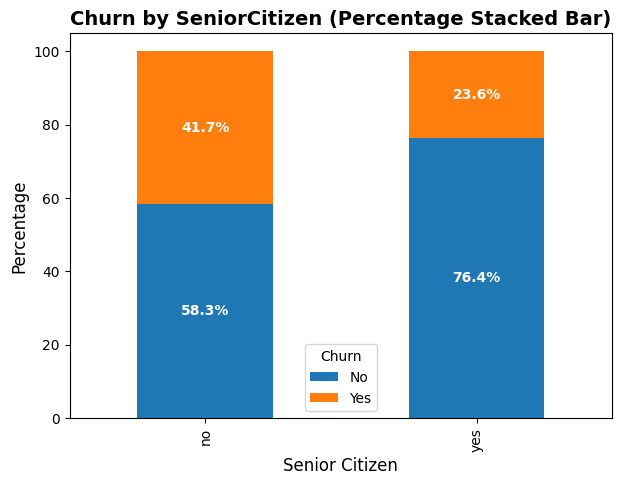

In [43]:
import matplotlib.pyplot as plt

# Pivot table
stack_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Row-wise percentage
stack_data_perc = stack_data.div(stack_data.sum(axis=1), axis=0) * 100

# Stacked bar chart with custom colors
ax = stack_data_perc.plot(
    kind='bar', 
    stacked=True, 
    figsize=(7,5), 
    color=["#1f77b4", "#ff7f0e"]   # blue & orange
)

# Labels add karo
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', color="white", fontsize=10, fontweight="bold")

plt.title("Churn by SeniorCitizen (Percentage Stacked Bar)", fontsize=14, fontweight="bold")
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Churn")
plt.show()


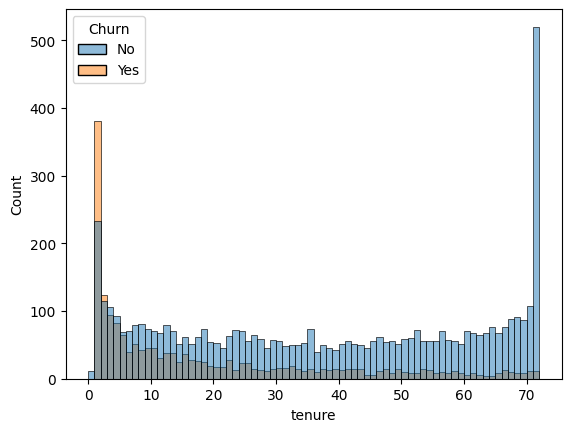

In [53]:
sns.histplot(x="tenure", data=df,bins=72,hue='Churn')
plt.Figure(figsize=(9,4))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

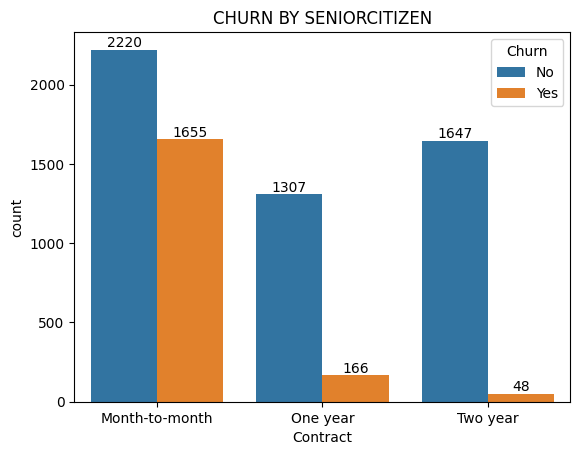

In [60]:
# values=df['Contract'].value_counts()
# labels=df['Contract'].value_counts().index
# for containers in 
# sns.countplot(values,labels=labels,autopct='%1.1f%%')
ax=sns.countplot(x='Contract',data=df,hue='Churn')
for containers in ax.containers:
 ax.bar_label(containers)
plt.title("CHURN BY SENIORCITIZEN")
plt.show

In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

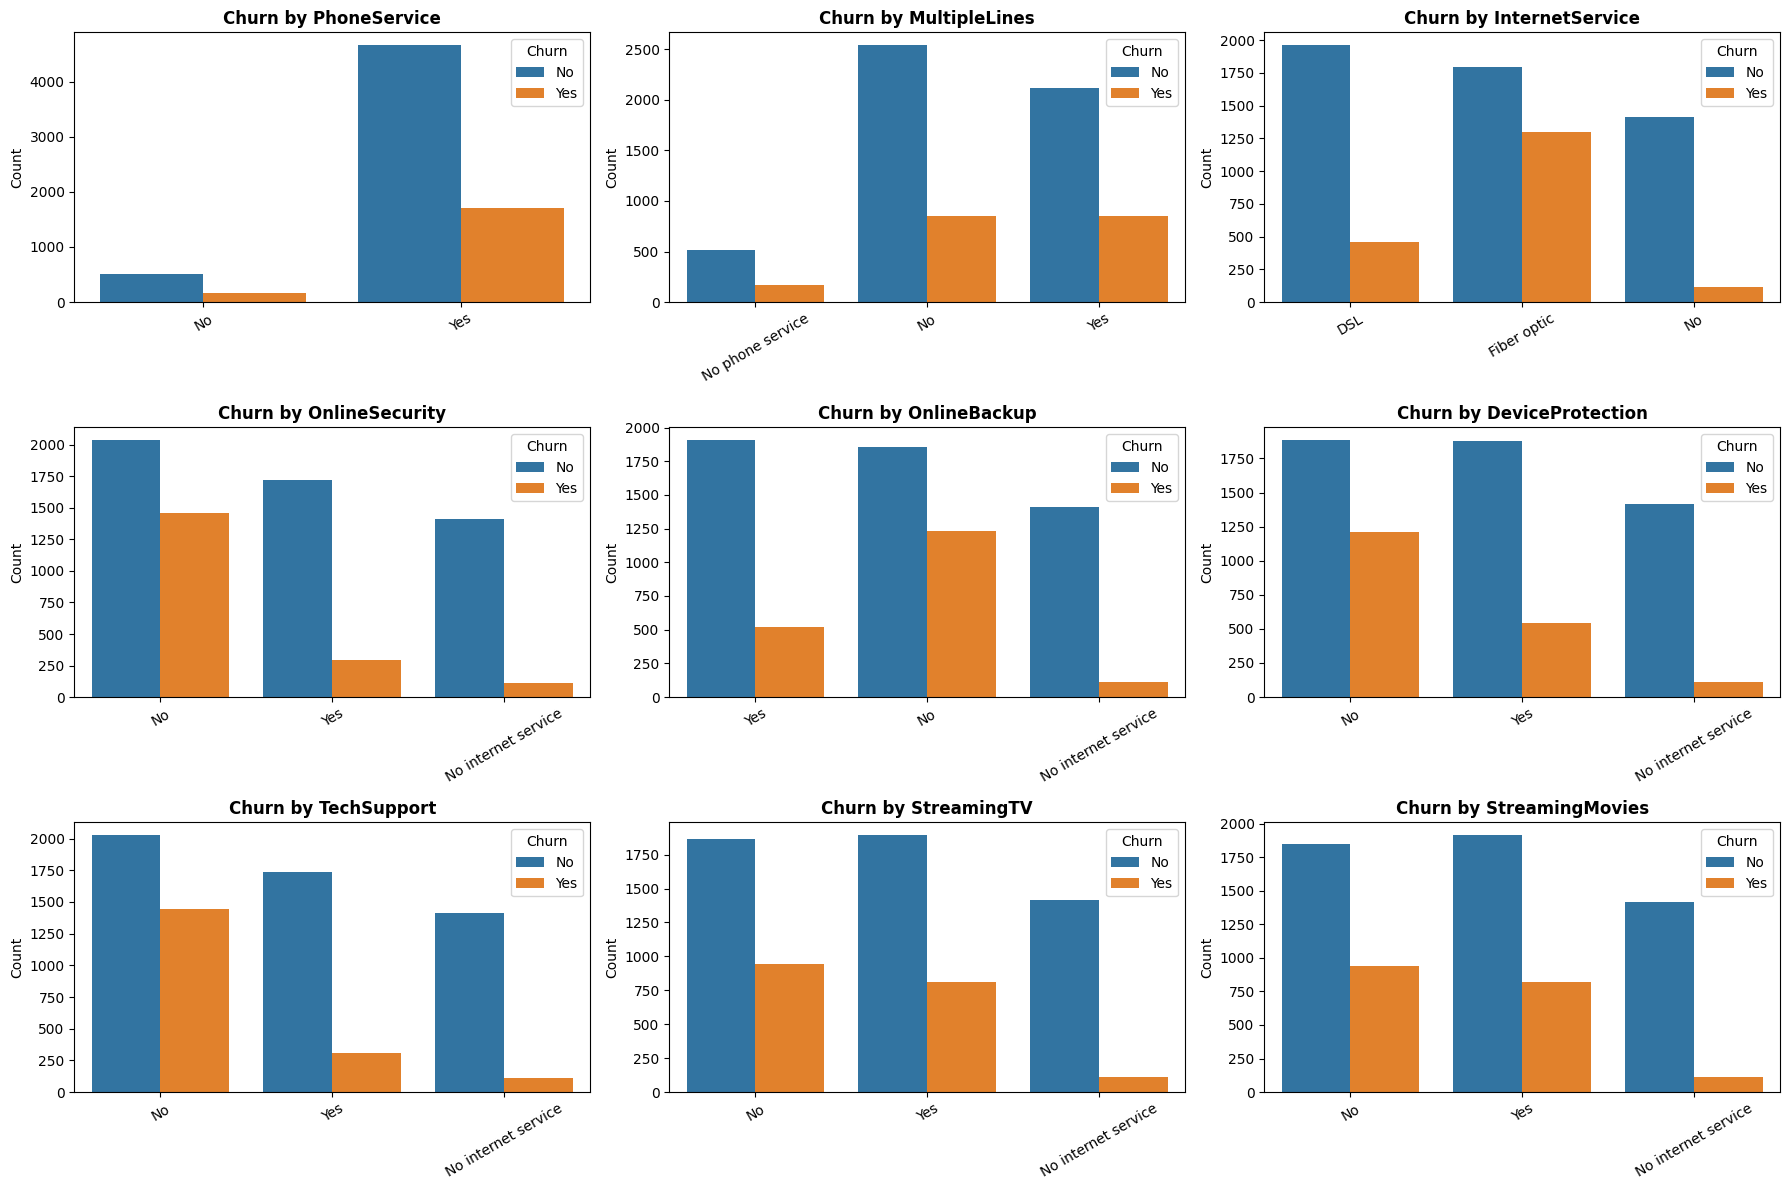

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Grid size (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over columns
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue="Churn", ax=ax, palette=["#1f77b4", "#ff7f0e"])
    ax.set_title(f"Churn by {col}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=30)

# Remove empty subplot if cols < total subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


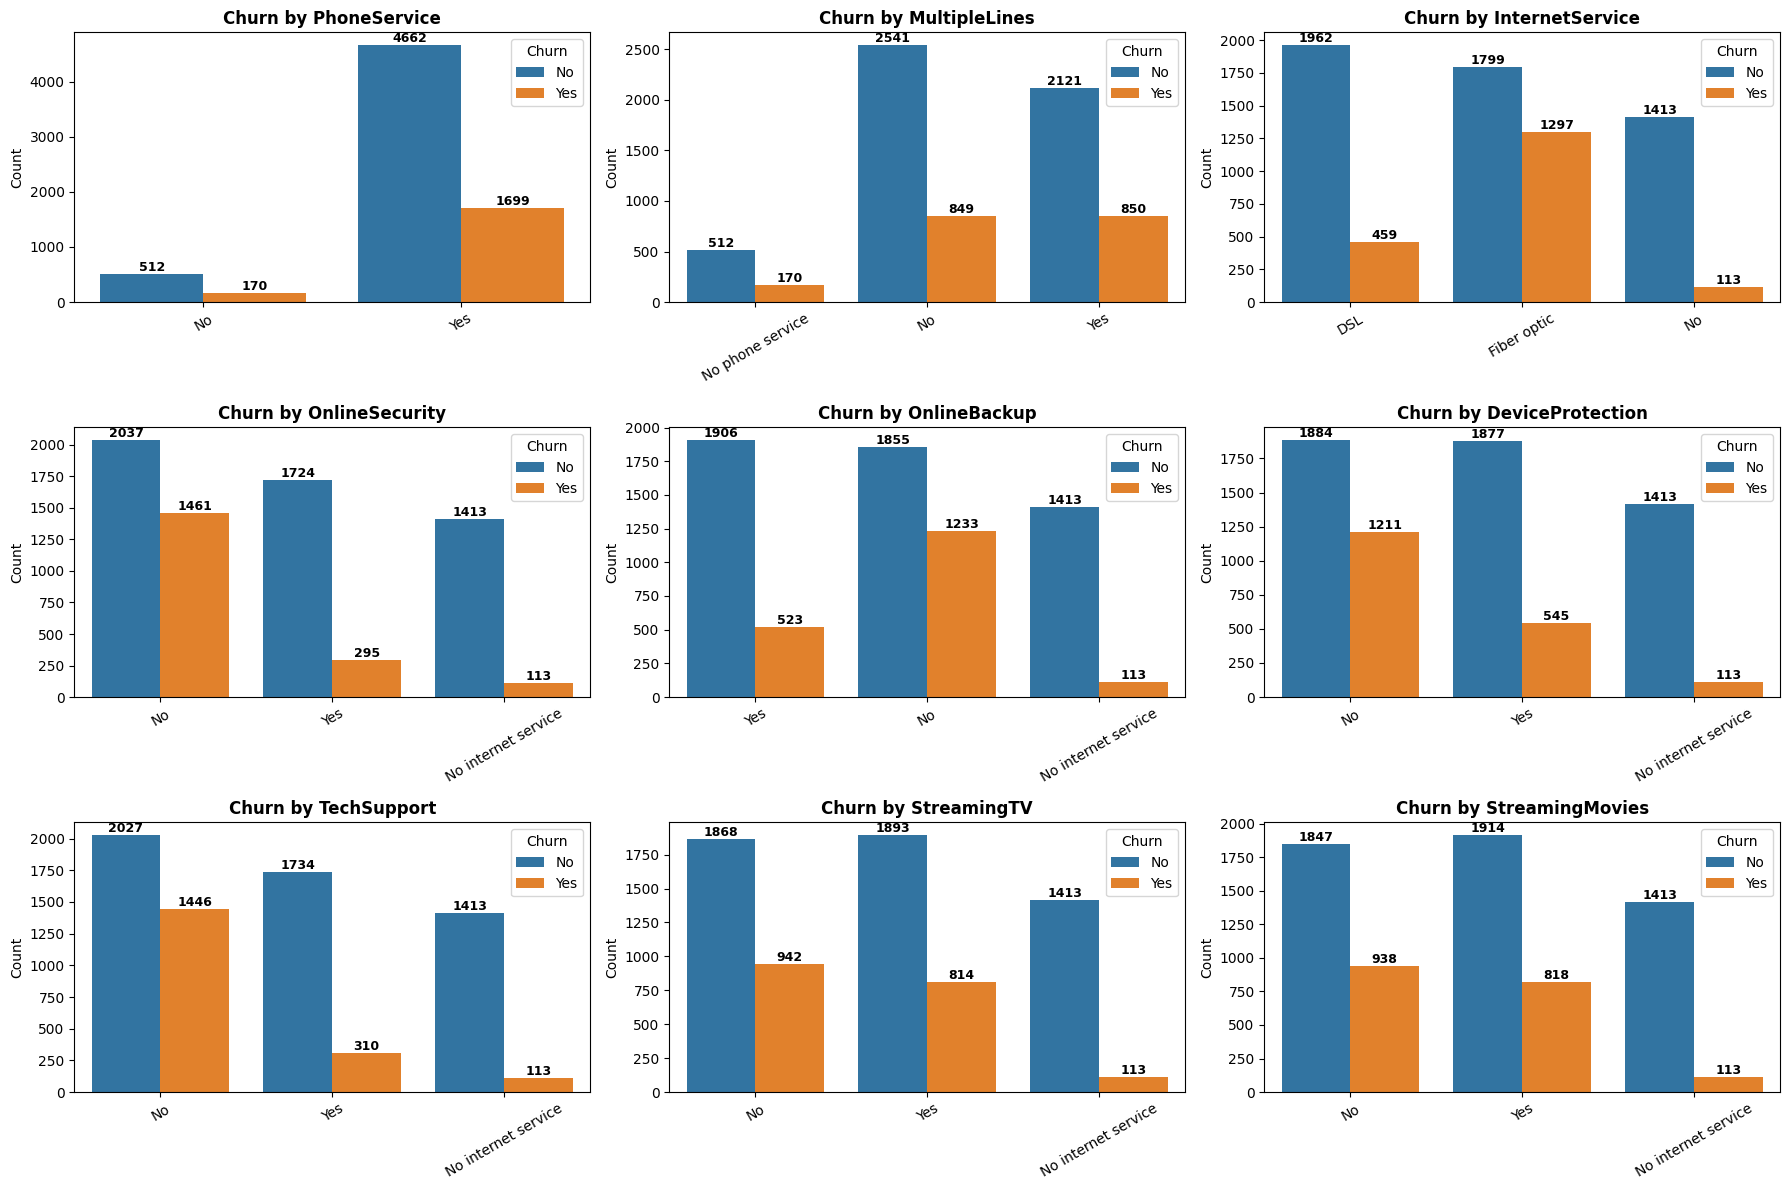

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Grid banani (3 rows x 3 cols)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue="Churn", ax=ax, palette=["#1f77b4", "#ff7f0e"])
    ax.set_title(f"Churn by {col}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=30)

    # 👉 Labels add karna (counts)
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fontweight="bold")

# Agar columns kam hote to empty subplot delete kar dete
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#
This visualization shows customer churn distribution across multiple services like PhoneService, InternetService, Security, Backup, DeviceProtection, TechSupport, Streaming, etc.

Customers without additional services (like OnlineSecurity, TechSupport, DeviceProtection) have higher churn rates.

Fiber optic internet users churn more compared to DSL.

Overall, customers with fewer value-added services are more likely to leave, highlighting retentio

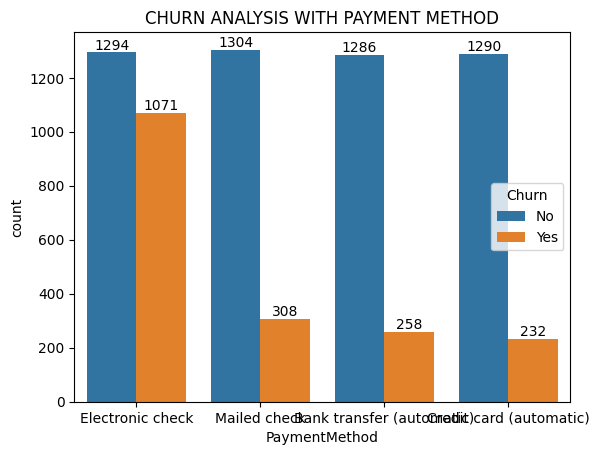

In [76]:
plt.Figure(figsize=(3,20))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)

plt.title('CHURN ANALYSIS WITH PAYMENT METHOD')
plt.show()    

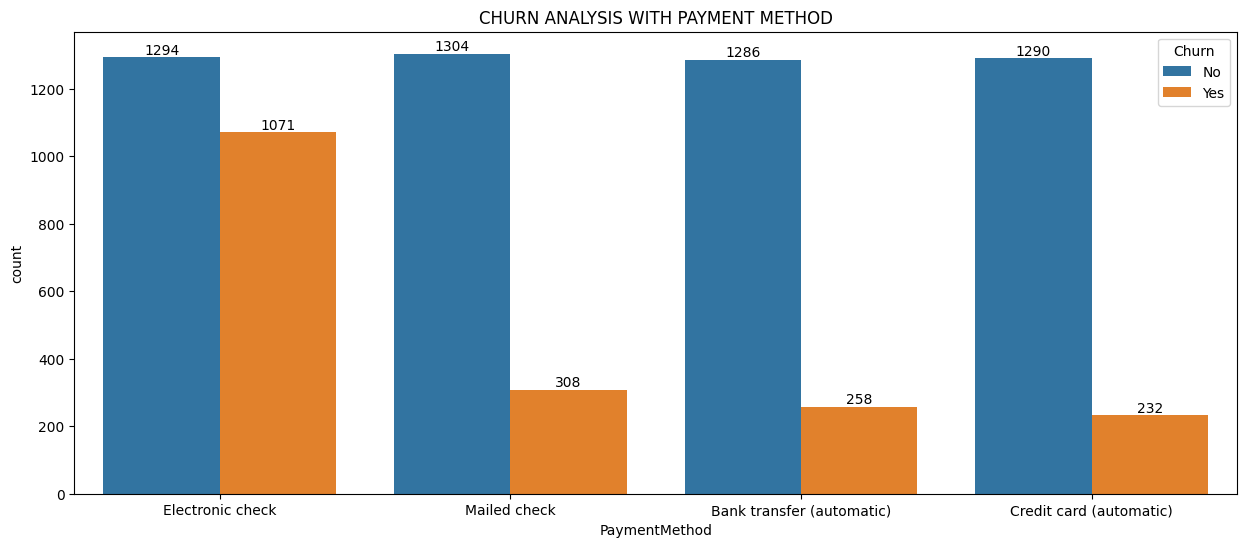

In [80]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')

for containers in ax.containers:
    ax.bar_label(containers)

plt.title('CHURN ANALYSIS WITH PAYMENT METHOD')
plt.xticks(rotation=0)  # 👈 categories clearly dikhengi
plt.show()


Electronic check users ka churn (Yes) sabse zyada hai.

Mailed check, Bank transfer, aur Credit card (automatic) methods use karne walon ka churn rate comparatively bohat kam hai.
